## 1.Import dataset and display first 5 rows

In [7]:
import pandas as pd
df=pd.read_csv("tvmarketing.csv")
print(df.head(5))

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


## 2.Check column data types

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None


## 3.Check the shape of the Data Frame (rows, columns)

In [9]:
r,c=df.shape
print("no of rows",r)
print("no of col",c)

no of rows 200
no of col 2


## 4.Look at summary statistics

In [10]:
print(df.describe())

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


## 5.Visualize the relationship between the features and the dependent variable using scatterplots

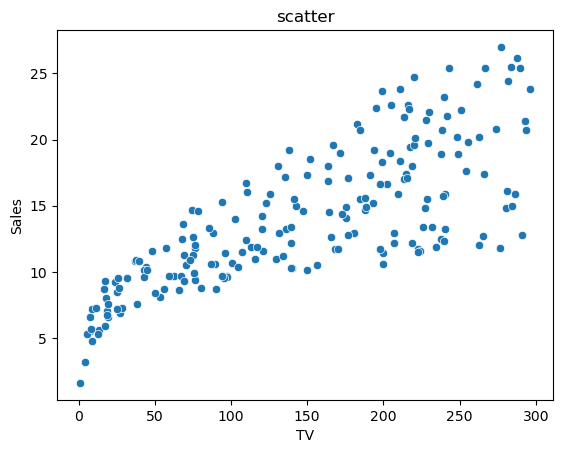

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=df['TV'],y=df['Sales'])
plt.title('scatter')
plt.show()

## 6.Prepare X (feature variables) and y (response variable)

In [12]:
x=df[['TV']]
y=df['Sales']

## 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## 8. Print the shape of train data and test data

In [14]:
print("shape of trained data", x_train.shape,y_train.shape)
print("shape of testing data",x_test.shape,y_test.shape)

shape of trained data (140, 1) (140,)
shape of testing data (60, 1) (60,)


## 9.Perform Linear Regression (on train data) without using any library and print the coefficients values

In [28]:
import numpy as np
x_train_np=np.c_[np.ones(x_train.shape[0]),x_train]
x_test_np=np.c_[np.ones(x_test.shape[0]),x_test]
theta = np.linalg.inv(x_train_np.T @ x_train_np) @ x_train_np.T @ y_train
print("\nManually Calculated Coefficients:")
print("Intercept:", theta[0])
print("Slope:", theta[1])


Manually Calculated Coefficients:
Intercept: 7.006613104818545
Slope: 0.049881788750673665


## 10.Create the model using the calculated coefficients and make predictions on the testing set

In [16]:
y_pred_manual = x_test_np @ theta
print(y_pred_manual)

[10.52826739  7.98429616  9.6752888  16.22975584 14.81810122  8.3783623
 21.27280469 11.78030029 20.12053537 18.98323058  9.23632906 18.94332515
 11.69051307 12.48363351  7.59023003 21.18800565 11.48100956 10.38859838
  8.43323226 14.35420059 18.97325423  7.42562013 20.2552162  18.84854975
 17.3271552  10.44845653  9.97956771 12.12947281 18.18013378 10.81758177
 12.36391722 18.70389257 15.83568971 17.51670599 15.16228557 18.37966094
 10.11424854 13.57604468 15.74091432  7.37075016 18.58417627 20.98349031
 13.46131657 16.93807725 21.04334846 16.86325456  8.57788945  7.66006454
 19.39724943 16.86325456 15.21216735 19.66661109 21.45736731 11.70547761
 18.84854975 10.81259359 16.9729945  20.81888041  7.97431981 17.82098491]


## 11.Perform Linear Regression using library(sklearn)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## 12.Print the intercept and coefficients

In [18]:
print("\nSklearn Model Coefficients:")
print("Intercept:", model.intercept_)
print("Slope ", model.coef_[0])


Sklearn Model Coefficients:
Intercept: 7.006613104818537
Slope  0.04988178875067373


## 13. Make predictions on the testing set - y_pred

In [19]:
y_pred = model.predict(x_test)
print(y_pred)

[10.52826739  7.98429616  9.6752888  16.22975584 14.81810122  8.3783623
 21.27280469 11.78030029 20.12053537 18.98323058  9.23632906 18.94332515
 11.69051307 12.48363351  7.59023003 21.18800565 11.48100956 10.38859838
  8.43323226 14.35420059 18.97325423  7.42562013 20.2552162  18.84854975
 17.3271552  10.44845653  9.97956771 12.12947281 18.18013378 10.81758177
 12.36391722 18.70389257 15.83568971 17.51670599 15.16228557 18.37966094
 10.11424854 13.57604468 15.74091432  7.37075016 18.58417627 20.98349031
 13.46131657 16.93807725 21.04334846 16.86325456  8.57788945  7.66006454
 19.39724943 16.86325456 15.21216735 19.66661109 21.45736731 11.70547761
 18.84854975 10.81259359 16.9729945  20.81888041  7.97431981 17.82098491]


## 14.Plot train data and the model

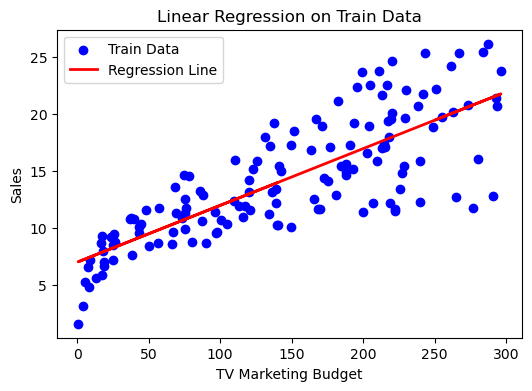

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train, color='blue', label="Train Data")
plt.plot(x_train, model.predict(x_train), color='red', linewidth=2, label="Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression on Train Data")
plt.legend()
plt.show()


## 15. Plot test data and the model

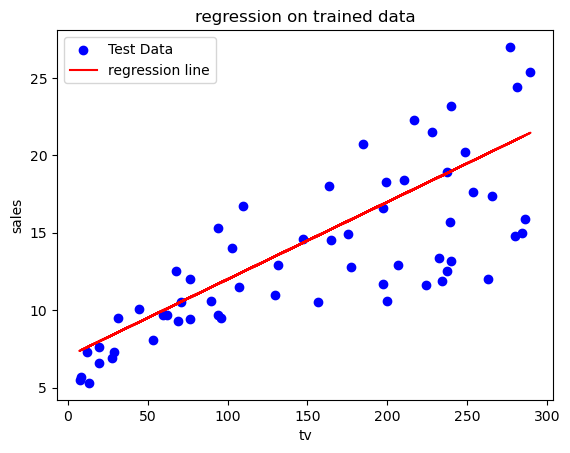

In [21]:
plt.scatter(x_test,y_test,color="blue",label="Test Data")
plt.plot(x_test,model.predict(x_test),color="red", label="regression line")
plt.title("regression on trained data")
plt.xlabel("tv")
plt.ylabel("sales")
plt.legend()
plt.show()

## 16. Print Mean Squared Error and R Squared Value

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R-Squared Value:", r2)


Mean Squared Error: 12.121689229956699
R-Squared Value: 0.5317000504824203


## 17.Calculate and print R Squared and Adjusted R Squared values without any library

In [27]:
n = x_test.shape[0]
p = x_test.shape[1]

ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual =np.sum((y_pred -np.mean(y_test)) ** 2)
r2_manual = (ss_residual / ss_total)
adj_r2_manual = 1 - ((1 - r2_manual) * (n - 1) / (n - p - 1))

print("\nManually Calculated R-Squared Value:", r2_manual)
print("Manually Calculated Adjusted R-Squared Value:", adj_r2_manual)



Manually Calculated R-Squared Value: 0.8182035875982944
Manually Calculated Adjusted R-Squared Value: 0.8150691666948167
